In [1]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [2]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [3]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [4]:
# moist['Time'].head()


In [5]:
moist = moist.set_index('Time')
# moist.head()


In [6]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-11 11:42:08,44.1250,20.4400,24
2019-06-11 11:43:11,44.2812,21.7237,24
2019-06-11 11:44:19,44.7812,21.4607,24
2019-06-11 11:45:22,44.4375,20.7031,24
2019-06-11 11:46:23,44.0625,21.6381,24


In [7]:
import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [8]:
# moist['2019-06-01 14:00':].Humidity.plot(legend=True)
# moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

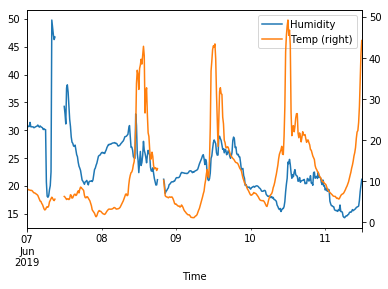

In [9]:
hourly = moist.resample('15Min').mean()
hourly['2019-06-07':].Humidity.plot(legend=True)
hourly['2019-06-07':].Temp.plot(secondary_y=True,legend=True)


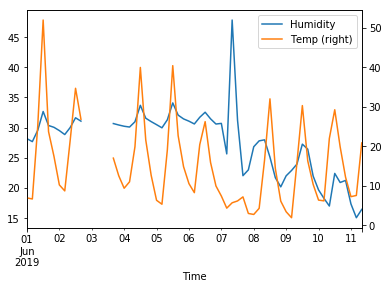

In [10]:
daily = moist.resample('4h').mean()
daily['2019-06':].Humidity.plot(legend=True)
daily['2019-06':].Temp.plot(secondary_y=True,legend=True)


In [11]:
submoist=moist['2019-06-06':]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
trendStart = submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()
# tf
# tf.Time.values.astype('float64')
# mt=tt.astype('timedelta64[m]')
tt1=tf.Time.values.astype('float64')
# tt1
mt=tt1.reshape(-1,1)
print(mt, mt.max())
mtmro=mt.max()+(24*3600)
print(mtmro.reshape(-1,1))
# mt=tt.to_pytimedelta
# print(mt.dtype,mt)
# print( m.dtype,m)

[[  6.10000000e+10]
 [  1.22000000e+11]
 [  1.82000000e+11]
 ..., 
 [  4.74212000e+14]
 [  4.74275000e+14]
 [  4.74336000e+14]] 4.74336e+14
[[  4.74336000e+14]]


In [12]:
from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('future time\t',newmt,'\nPredicted\t',z)
print(regr.coef_)

4.74336e+14 
 474336000864000.0
future time	 [[  4.74336001e+14]] 
Predicted	 [ 17.04969879]
[ -3.27045698e-14]


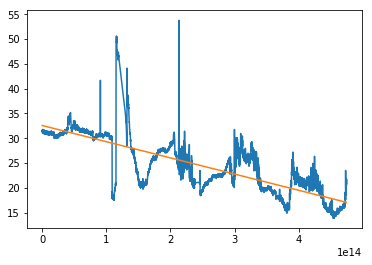

In [13]:
import matplotlib.pyplot as plt
plt.plot(mt,m)
plt.plot(mt,regr.predict(mt))

In [14]:
from datetime import datetime
#print(datetime.datetime.now().timestamp)
print(datetime.now())

2019-06-11 11:47:48.515189


In [18]:
from datetime import datetime,timedelta
startDate = datetime.now()-timedelta(5)
print (startDate.strftime('%Y-%m-%d'),'\n\n')

strtDate =startDate.strftime('%Y-%m-%d')

submoist=moist[strtDate:]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()

daysfcst = 3
fdate = (datetime.now() + timedelta(daysfcst)).strftime('%Y-%m-%d')

tt1=tf.Time.values.astype('float64')

from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*daysfcst)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('New future time\t',fdate,'\npredicted\t',z,'\nslope\t',regr.coef_)



2019-06-06 


4.74336e+14 
 474336000259200.0
New future time	 2019-06-09 
predicted	 [ 17.04969881] 
slope	 [ -3.27045698e-14]
